In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import numpy as np
import operator
import xlsxwriter

Using TensorFlow backend.


In [2]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

# X_train = X_train / 255 # 28*28 = 784 neuron
# X_test = X_test / 255
# one hot encode outputs.

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]






In [3]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255 # 28*28 = 784 neuron
X_test = X_test / 255

In [5]:
W = np.random.rand(10,784)


In [6]:
#initializition:
η = 1
e = 0
n = 50
W = np.random.rand(10,784)
epoch = 1
err = np.zeros((100000,1))
TrainingErr = np.zeros((100000,1))

In [7]:
# Temp = np.dot(W, X_train[1,:]) 
# print(Temp)
# print(np.size(Temp))
# print(Temp.shape)

# Temp2 = np.matmul(W, X_train[1,:]) 
# print(Temp2)
# print(np.size(Temp2))
# Temp2.shape

In [9]:
import numpy as np
W = [1,2,3,4]
X = np.matrix([[1,1,1,1],[2,2,2,2],[-3,3,3,3],[-4,4,4,4]])
np.heaviside(np.dot(W, X),0)

matrix([[0., 1., 1., 1.]])

In [9]:
j = 0
Temp = 1

while  Temp > e:
    
    for i in range(n):                                                   # We will count the misclassification Error
        v = np.dot(W, X_train[i,:])                                     # The v is 10 row and 1 column!

        index, value = max(enumerate(v), key = operator.itemgetter(1))
    #         print(value)
    #         print(np.size(value))
    #         print(index)
    #         print(np.size(index))
        indexy, valuey = max(enumerate(y_train[(i)]), key = operator.itemgetter(1))
    #         print(indexy,valuey)
    #         print(np.size(index))
    #         index, value = max(enumerate(v), key=operator.itemgetter(1))
        if index != indexy:
            err[(epoch)] = err[(epoch)] + 1
        if i == n:
            print(err[(epoch)])


    epoch = epoch + 1
    print(epoch)
        
    for i in range(n):
        indexy, valuey = max(enumerate(y_train[(i)]), key = operator.itemgetter(1))
        d = np.zeros(10)
        d[indexy] = 1
        W = W + η * np.matmul(np.expand_dims((d - np.heaviside(np.dot(W, X_train[i,:]),0)), axis=-1), np.expand_dims(X_train[i,:], axis=0))
      
    TrainingErr[(j)] = err[epoch-1]/n
    Temp = TrainingErr[j]
    j = j + 1
    
    print("Training Error " , Temp)

2
Training Error  [0.78]
3
Training Error  [0.26]
4
Training Error  [0.12]
5
Training Error  [0.]


In [9]:
def mypow(base,exponent, mod):
    
    prod = 1
    while exponent > 0:
        
        # check wehther the last digit of the exponent is one or not
        if exponent & 1 == 1:
            prod *= base
        
        base *= base 
        exponent //= 2
    
    return prod

In [17]:
mypow(2,100,2215)

1267650600228229401496703205376

In [20]:
pow(2,100000)

9990020930143845079440327643300335909804291390541816917715292738631458324642573483274873313324496504031643944455558549300187996607656176562908471354247492875198889629873671093246350427373112479265800278531241088737085605287228390164568691026850675923517914697052857644696801524832345475543250292786520806957770971741102232042976351205330777996897925116619870771785775955521720081320295204617949229259295623920965797873558158667525495797313144806249260261837941305080582686031535134178739622834990886357758062104606636372130587795322344972010808486369541401835851359858035603574021872908155566580607186461268972839794621842267579349638893357247588761959137656762411125020708704870465179396398710109200363934745618090601613377898560296863598558024761448933047052222860131377095958357319485898496404572383875170702242332633436894423297381877733153286944217936125301907868903603663283161502726139934152804071171914923903341874935394455896301292197256417717233543544751552379310892268182402452755752094704

(-0.1, 100)

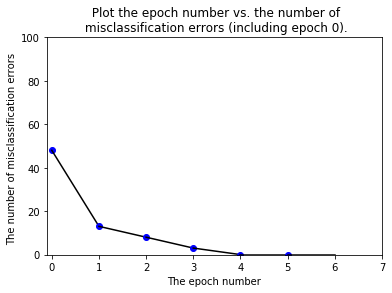

In [26]:
plt.xlabel('The epoch number')
plt.ylabel('The number of misclassification errors ')
plt.title(' Plot the epoch number vs. the number of\n misclassification errors (including epoch 0).')


for i in range(epoch):
    plt.plot(i,TrainingErr[i]*n, 'bo', (i,i+1),(TrainingErr[i]*n,TrainingErr[i+1]*n), 'k')
    

# axes.plot(x,x**2, marker='o')

plt.xlim([-.1,7])
plt.ylim([-0.1,100])

In [27]:
errt = np.zeros((100000,1))
epocht = 1
m = 10000
for i in range(m):                                                 
    v = np.dot(W, X_test[i,:])                                     
    index, value = max(enumerate(v), key = operator.itemgetter(1))
    indexy, valuey = max(enumerate(y_test[(i)]), key = operator.itemgetter(1))
    if index != indexy:
        errt[(i)] = errt[(i)] + 1

print(errt)
a,b = np.nonzero(errt)
print(a.shape)

#Missclassification will be:
indexe,valuee = np.nonzero(errt)
ErrPercentage = (np.size(indexe))/m

print("ErrPercentage : ", ErrPercentage)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
(3821,)
ErrPercentage :  0.3821


Well, The number of training samples are very small, so our trained function fit(somehow overfit) to them. 
as aresult we had 0 error classification over there. So this model is not a good one for generalization to 
test data which are also a lot.

(g)

2
Training Error  [0.862]
3
Training Error  [0.218]
4
Training Error  [0.163]
5
Training Error  [0.088]
6
Training Error  [0.127]
7
Training Error  [0.061]
8
Training Error  [0.037]
9
Training Error  [0.062]
10
Training Error  [0.035]
11
Training Error  [0.088]
12
Training Error  [0.043]
13
Training Error  [0.048]
14
Training Error  [0.041]
15
Training Error  [0.054]
16
Training Error  [0.026]
17
Training Error  [0.067]
18
Training Error  [0.054]
19
Training Error  [0.031]
20
Training Error  [0.034]
21
Training Error  [0.011]
22
Training Error  [0.023]
23
Training Error  [0.011]
24
Training Error  [0.02]
25
Training Error  [0.022]
26
Training Error  [0.014]
27
Training Error  [0.007]
28
Training Error  [0.005]
29
Training Error  [0.009]
30
Training Error  [0.002]
31
Training Error  [0.015]
32
Training Error  [0.007]
33
Training Error  [0.004]
34
Training Error  [0.001]
35
Training Error  [0.012]
36
Training Error  [0.005]
37
Training Error  [0.002]
38
Training Error  [0.003]
39
Trainin

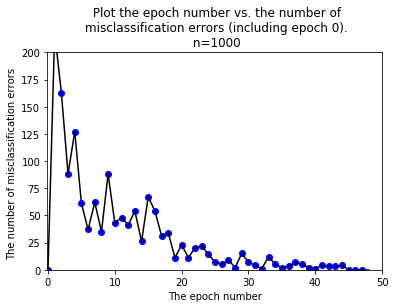

In [32]:
#initializition:
η = 1
e = 0
n = 1000
W = np.random.rand(10,784)
epoch = 1
err = np.zeros((100000,1))
TrainingErr = np.zeros((100000,1))

j = 0
Temp = 1

while  Temp > e:
    
    for i in range(n):                                                   # We will count the misclassification Error
        v = np.dot(W, X_train[i,:])                                     # The v is 10 row and 1 column!

        index, value = max(enumerate(v), key = operator.itemgetter(1))
    #         print(value)
    #         print(np.size(value))
    #         print(index)
    #         print(np.size(index))
        indexy, valuey = max(enumerate(y_train[(i)]), key = operator.itemgetter(1))
    #         print(indexy,valuey)
    #         print(np.size(index))
    #         index, value = max(enumerate(v), key=operator.itemgetter(1))
        if index != indexy:
            err[(epoch)] = err[(epoch)] + 1
        if i == n:
            print(err[(epoch)])


    epoch = epoch + 1
    print(epoch)
        
    for i in range(n):
        indexy, valuey = max(enumerate(y_train[(i)]), key = operator.itemgetter(1))
        d = np.zeros(10)
        d[indexy] = 1
        W = W + η * np.matmul(np.expand_dims((d - np.heaviside(np.dot(W, X_train[i,:]),0)), axis=-1), np.expand_dims(X_train[i,:], axis=0))
      
    TrainingErr[(j)] = err[epoch-1]/n
    Temp = TrainingErr[j]
    j = j + 1
    
    print("Training Error " , Temp)
    

j = 0
Temp = 1

while  Temp > e:
    
    for i in range(n):                                                   # We will count the misclassification Error
        v = np.dot(W, X_train[i,:])                                     # The v is 10 row and 1 column!

        index, value = max(enumerate(v), key = operator.itemgetter(1))
    #         print(value)
    #         print(np.size(value))
    #         print(index)
    #         print(np.size(index))
        indexy, valuey = max(enumerate(y_train[(i)]), key = operator.itemgetter(1))
    #         print(indexy,valuey)
    #         print(np.size(index))
    #         index, value = max(enumerate(v), key=operator.itemgetter(1))
        if index != indexy:
            err[(epoch)] = err[(epoch)] + 1
        if i == n:
            print(err[(epoch)])


    epoch = epoch + 1
    print(epoch)
        
    for i in range(n):
        indexy, valuey = max(enumerate(y_train[(i)]), key = operator.itemgetter(1))
        d = np.zeros(10)
        d[indexy] = 1
        W = W + η * np.matmul(np.expand_dims((d - np.heaviside(np.dot(W, X_train[i,:]),0)), axis=-1), np.expand_dims(X_train[i,:], axis=0))
      
    TrainingErr[(j)] = err[epoch-1]/n
    Temp = TrainingErr[j]
    j = j + 1
    
    print("Training Error " , Temp)

plt.xlabel('The epoch number')
plt.ylabel('The number of misclassification errors ')
plt.title(' Plot the epoch number vs. the number of\n misclassification errors (including epoch 0).\n n=1000')


for i in range(epoch):
    plt.plot(i,TrainingErr[i]*n, 'bo', (i,i+1),(TrainingErr[i]*n,TrainingErr[i+1]*n), 'k')
    

# axes.plot(x,x**2, marker='o')

plt.xlim([-.1,50])
plt.ylim([-0.1,200])
    
errt = np.zeros((100000,1))
epocht = 1
m = 10000
for i in range(m):                                                 
    v = np.dot(W, X_test[i,:])                                     
    index, value = max(enumerate(v), key = operator.itemgetter(1))
    indexy, valuey = max(enumerate(y_test[(i)]), key = operator.itemgetter(1))
    if index != indexy:
        errt[(i)] = errt[(i)] + 1

print(errt)
a,b = np.nonzero(errt)
print(a.shape)

#Missclassification will be:
indexe,valuee = np.nonzero(errt)
ErrPercentage = (np.size(indexe))/m

print("ErrPercentage : ", ErrPercentage)

ErrPercentage is equal to  0.1735 in n=1000. so the model become better for other data which has been not shown. 
The reason is the high number of data in learning process in comparison to the previous one. Generally when we have
10*784 weights, we should have large number of training set, otherwise, our model will overfit and can not be generalaized to other
new datas.

(h) Run Step (d) for n = 60000 and ϵ = 0. Make note of (i.e., plot) the errors as the number of
epochs grow large, and note that the algorithm may not converge. Comment on the results.

In [34]:
#initializition:
η = 1
e = 0
n = 60000
W = np.random.rand(10,784)
epoch = 1
err = np.zeros((100000,1))
TrainingErr = np.zeros((100000,1))

j = 0
Temp = 1

while  Temp > e:
    
    for i in range(n):                                                   # We will count the misclassification Error
        v = np.dot(W, X_train[i,:])                                     # The v is 10 row and 1 column!

        index, value = max(enumerate(v), key = operator.itemgetter(1))
    #         print(value)
    #         print(np.size(value))
    #         print(index)
    #         print(np.size(index))
        indexy, valuey = max(enumerate(y_train[(i)]), key = operator.itemgetter(1))
    #         print(indexy,valuey)
    #         print(np.size(index))
    #         index, value = max(enumerate(v), key=operator.itemgetter(1))
        if index != indexy:
            err[(epoch)] = err[(epoch)] + 1
        if i == n:
            print(err[(epoch)])


    epoch = epoch + 1
    print(epoch)
        
    for i in range(n):
        indexy, valuey = max(enumerate(y_train[(i)]), key = operator.itemgetter(1))
        d = np.zeros(10)
        d[indexy] = 1
        W = W + η * np.matmul(np.expand_dims((d - np.heaviside(np.dot(W, X_train[i,:]),0)), axis=-1), np.expand_dims(X_train[i,:], axis=0))
      
    TrainingErr[(j)] = err[epoch-1]/n
    Temp = TrainingErr[j]
    j = j + 1
    
    print("Training Error " , Temp)
    

j = 0
Temp = 1

while  Temp > e:
    
    for i in range(n):                                                   # We will count the misclassification Error
        v = np.dot(W, X_train[i,:])                                     # The v is 10 row and 1 column!

        index, value = max(enumerate(v), key = operator.itemgetter(1))
    #         print(value)
    #         print(np.size(value))
    #         print(index)
    #         print(np.size(index))
        indexy, valuey = max(enumerate(y_train[(i)]), key = operator.itemgetter(1))
    #         print(indexy,valuey)
    #         print(np.size(index))
    #         index, value = max(enumerate(v), key=operator.itemgetter(1))
        if index != indexy:
            err[(epoch)] = err[(epoch)] + 1
        if i == n:
            print(err[(epoch)])


    epoch = epoch + 1
    print(epoch)
        
    for i in range(n):
        indexy, valuey = max(enumerate(y_train[(i)]), key = operator.itemgetter(1))
        d = np.zeros(10)
        d[indexy] = 1
        W = W + η * np.matmul(np.expand_dims((d - np.heaviside(np.dot(W, X_train[i,:]),0)), axis=-1), np.expand_dims(X_train[i,:], axis=0))
      
    TrainingErr[(j)] = err[epoch-1]/n
    Temp = TrainingErr[j]
    j = j + 1
    
    print("Training Error " , Temp)

plt.xlabel('The epoch number')
plt.ylabel('The number of misclassification errors ')
plt.title(' Plot the epoch number vs. the number of\n misclassification errors (including epoch 0).\n n=1000')


for i in range(epoch):
    plt.plot(i,TrainingErr[i]*n, 'bo', (i,i+1),(TrainingErr[i]*n,TrainingErr[i+1]*n), 'k')
    

# axes.plot(x,x**2, marker='o')

plt.xlim([-.1,300])
plt.ylim([-0.1,20000])
    
errt = np.zeros((100000,1))
epocht = 1
m = 10000
for i in range(m):                                                 
    v = np.dot(W, X_test[i,:])                                     
    index, value = max(enumerate(v), key = operator.itemgetter(1))
    indexy, valuey = max(enumerate(y_test[(i)]), key = operator.itemgetter(1))
    if index != indexy:
        errt[(i)] = errt[(i)] + 1

print(errt)
a,b = np.nonzero(errt)
print(a.shape)

#Missclassification will be:
indexe,valuee = np.nonzero(errt)
ErrPercentage = (np.size(indexe))/m

print("ErrPercentage : ", ErrPercentage)

2
Training Error  [0.90026667]
3
Training Error  [0.17998333]
4
Training Error  [0.16501667]
5
Training Error  [0.15841667]
6
Training Error  [0.1447]
7
Training Error  [0.15115]
8
Training Error  [0.16778333]
9
Training Error  [0.17416667]
10
Training Error  [0.16326667]
11
Training Error  [0.14053333]
12
Training Error  [0.17345]
13
Training Error  [0.15648333]
14
Training Error  [0.15793333]
15
Training Error  [0.14925]
16
Training Error  [0.13886667]
17
Training Error  [0.14095]
18
Training Error  [0.15396667]
19
Training Error  [0.14993333]
20
Training Error  [0.14543333]
21
Training Error  [0.15191667]
22
Training Error  [0.15278333]
23
Training Error  [0.16136667]
24
Training Error  [0.1485]
25
Training Error  [0.15785]
26
Training Error  [0.15391667]
27
Training Error  [0.14493333]
28
Training Error  [0.14813333]
29
Training Error  [0.14606667]
30
Training Error  [0.17008333]
31
Training Error  [0.1582]
32
Training Error  [0.16866667]
33
Training Error  [0.16011667]
34
Training

KeyboardInterrupt: 

As you may have seen the model will not converge and the error for training set fluctuate around .13,.12 and .15.

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
(1522,)
ErrPercentage :  0.1522


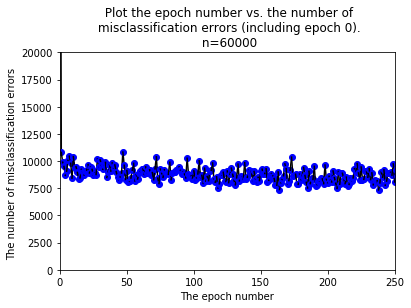

In [43]:

plt.xlabel('The epoch number')
plt.ylabel('The number of misclassification errors ')
plt.title(' Plot the epoch number vs. the number of\n misclassification errors (including epoch 0).\n n=60000')


for i in range(epoch):
    plt.plot(i,TrainingErr[i]*n, 'bo', (i,i+1),(TrainingErr[i]*n,TrainingErr[i+1]*n), 'k')
    

# axes.plot(x,x**2, marker='o')

plt.xlim([-.1,250])
plt.ylim([-0.1,20000])
    
errt = np.zeros((100000,1))
epocht = 1
m = 10000
for i in range(m):                                                 
    v = np.dot(W, X_test[i,:])                                     
    index, value = max(enumerate(v), key = operator.itemgetter(1))
    indexy, valuey = max(enumerate(y_test[(i)]), key = operator.itemgetter(1))
    if index != indexy:
        errt[(i)] = errt[(i)] + 1

print(errt)
a,b = np.nonzero(errt)
print(a.shape)

#Missclassification will be:
indexe,valuee = np.nonzero(errt)
ErrPercentage = (np.size(indexe))/m

print("ErrPercentage : ", ErrPercentage)

(i) Using your observations in the previous step, pick some appropriate value for ϵ (such that your
algorithm in (d) will eventually terminate). Repeat the following two subitems three times with
different initial weights and comment on the results:
• Run Step (d) for n = 60000, some η of your choice and the ϵ you picked.
• Run Step (e) to with the W you obtained in the previous step.


In [59]:
from random import random
#initializition:
η = 10
e = .08
n = 60000
W = np.random.rand(10,784)
epoch = 1
err = np.zeros((100000,1))
TrainingErr = np.zeros((100000,1))


j = 0
Temp = 1

while  Temp > e:
    
    for i in range(n):                                                   # We will count the misclassification Error
        v = np.dot(W, X_train[i,:])                                     # The v is 10 row and 1 column!

        index, value = max(enumerate(v), key = operator.itemgetter(1))
    #         print(value)
    #         print(np.size(value))
    #         print(index)
    #         print(np.size(index))
        indexy, valuey = max(enumerate(y_train[(i)]), key = operator.itemgetter(1))
    #         print(indexy,valuey)
    #         print(np.size(index))
    #         index, value = max(enumerate(v), key=operator.itemgetter(1))
        if index != indexy:
            err[(epoch)] = err[(epoch)] + 1
        if i == n:
            print(err[(epoch)])


    epoch = epoch + 1
    print(epoch)
    
    if Temp > err[epoch-1]/n:
        η = 10 * random()
    if Temp < err[epoch-1]/n:
        η = 200 * random()
    
        
    for i in range(n):
        indexy, valuey = max(enumerate(y_train[(i)]), key = operator.itemgetter(1))
        d = np.zeros(10)
        d[indexy] = 1
        W = W + η * np.matmul(np.expand_dims((d - np.heaviside(np.dot(W, X_train[i,:]),0)), axis=-1), np.expand_dims(X_train[i,:], axis=0))
      
    TrainingErr[(j)] = err[epoch-1]/n
    Temp = TrainingErr[j]
    j = j + 1
    
    print("Training Error " , Temp)


2
Training Error  [0.88411667]
3
Training Error  [0.1588]
4
Training Error  [0.15623333]
5
Training Error  [0.1527]
6
Training Error  [0.0988]
7
Training Error  [0.15141667]
8
Training Error  [0.15486667]
9
Training Error  [0.11841667]
10
Training Error  [0.08991667]
11
Training Error  [0.09576667]
12
Training Error  [0.15903333]
13
Training Error  [0.1643]
14
Training Error  [0.15606667]
15
Training Error  [0.08736667]
16
Training Error  [0.08448333]
17
Training Error  [0.08393333]
18
Training Error  [0.08658333]
19
Training Error  [0.16948333]
20
Training Error  [0.14386667]
21
Training Error  [0.08346667]
22
Training Error  [0.08566667]
23
Training Error  [0.13778333]
24
Training Error  [0.08931667]
25
Training Error  [0.08593333]
26
Training Error  [0.08685]
27
Training Error  [0.17783333]
28
Training Error  [0.15973333]
29
Training Error  [0.08393333]
30
Training Error  [0.08205]
31
Training Error  [0.08116667]
32
Training Error  [0.07948333]


[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
(923,)
ErrPercentage :  0.0923


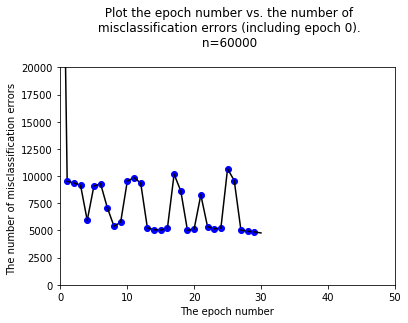

In [64]:

plt.xlabel('The epoch number')
plt.ylabel('The number of misclassification errors ')
plt.title(' Plot the epoch number vs. the number of\n misclassification errors (including epoch 0).\n n=60000\n ')


for i in range(epoch-2):
    plt.plot(i,TrainingErr[i]*n, 'bo', (i,i+1),(TrainingErr[i]*n,TrainingErr[i+1]*n), 'k')
    

# axes.plot(x,x**2, marker='o')

plt.xlim([-.1,50])
plt.ylim([-0.1,20000])
    
errt = np.zeros((100000,1))
epocht = 1
m = 10000
for i in range(m):                                                 
    v = np.dot(W, X_test[i,:])                                     
    index, value = max(enumerate(v), key = operator.itemgetter(1))
    indexy, valuey = max(enumerate(y_test[(i)]), key = operator.itemgetter(1))
    if index != indexy:
        errt[(i)] = errt[(i)] + 1

print(errt)
a,b = np.nonzero(errt)
print(a.shape)

#Missclassification will be:
indexe,valuee = np.nonzero(errt)
ErrPercentage = (np.size(indexe))/m

print("ErrPercentage : ", ErrPercentage)

NOTE :     if Temp > err[epoch-1]/n:
        η = 10 * random()
    if Temp < err[epoch-1]/n:
        η = 200 * random()
        
As you see, I did not specify η, instead select it based on the flow. If we are reaching good result, η getting smaller
otherwise, η getting bigger.
As you can see the trainingerror in 32 epoch become .79 and testing error is .09 
